# Predição de spam por ocorrencia de palavras

## Importando bibliotecas e carregando dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Dados/emails.csv')

## Analise Exploratoria

In [3]:
dados.shape

(5172, 3002)

In [4]:
dados.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
vetor_nulos = dados.isnull().sum()

In [6]:
vetor_nulos.loc[vetor_nulos.values > 0]

Series([], dtype: int64)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


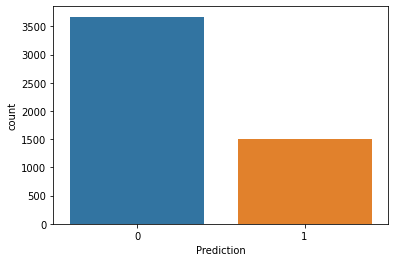

In [8]:
sns.countplot(dados['Prediction'])

## Pré processamento de dados

In [9]:
dados.drop(columns= 'Email No.', inplace = True)

In [10]:
dados.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Adicionando uma coluna chamada total com a quantidade total de palavras do email

In [11]:
dados.insert(3000, 'Total', dados.sum(axis= 1))

In [12]:
dados

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Total,Prediction
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2203,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1019,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,505,0
5168,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2939,0
5169,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,1
5170,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,788,1


In [13]:
total_agrupado = dados['Total'].groupby(dados['Prediction']).mean()

total_agrupado

Prediction
0    1045.391885
1    1459.798667
Name: Total, dtype: float64

Text(0, 0.5, 'Media de total de palavras')

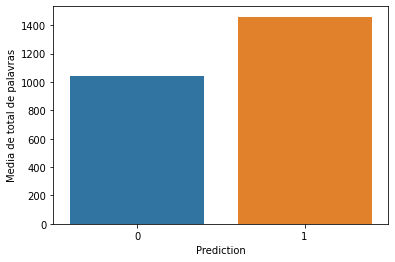

In [14]:
sns.barplot(x= total_agrupado.index, y= total_agrupado.values)

plt.ylabel('Media de total de palavras')

Adicionando coluna com quantidade de palavras maior que 4 letras

In [15]:
num_letras = dados.columns.str.len().to_series()

In [16]:
num_letras.reset_index(drop= True, inplace= True)

In [17]:
num_letras.drop(index= [3000, 3001], inplace= True)

In [18]:
num_letras

0        3
1        2
2        3
3        3
4        3
        ..
2995    14
2996     8
2997     8
2998     2
2999     3
Length: 3000, dtype: int64

In [19]:
palavras_maior = num_letras[num_letras >= 5]

In [20]:
dados.iloc[:, palavras_maior.index].sum(axis= 1).values

array([  4, 154,   8, ...,   7,  35, 137])

In [21]:
dados.insert(3001, 'Num de palavras >3', dados.iloc[:, palavras_maior.index].sum(axis= 1).values)

In [22]:
num_palavras_agrupado = dados['Num de palavras >3'].groupby(dados['Prediction'])

In [23]:
num_palavras_agrupado.mean()

Prediction
0    59.891068
1    65.384000
Name: Num de palavras >3, dtype: float64

In [24]:
dados

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Total,Num de palavras >3,Prediction
0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,4,0
1,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2203,154,0
2,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,8,0
3,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1019,62,0
4,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1075,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,6,1,0,0,20,1,0,0,1,0,0,3,0,18,1,5,0,0,2,2,0,1,0,3,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,505,39,0
5168,35,27,11,2,6,5,151,4,3,23,18,6,3,1,98,10,6,2,2,6,1,11,15,101,2,12,1,3,25,3,5,14,7,14,0,3,0,0,1,17,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2939,153,0
5169,0,0,1,1,0,0,11,0,0,1,1,3,1,0,10,0,0,0,0,0,0,1,0,11,0,1,0,0,1,0,0,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,179,7,1
5170,2,7,1,0,2,1,28,2,0,8,11,7,1,0,39,1,0,0,0,2,1,3,3,37,0,8,0,4,5,1,0,5,0,3,1,1,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,788,35,1


## Aplicando machine learning

In [25]:
X = dados.iloc[:, 0:3002].values
y = dados.iloc[:, 3002].values

In [26]:
X_treinamento, X_test, y_treinamento, y_test = train_test_split(X, y, test_size = 0.5, stratify= y)

In [27]:
rfc = RandomForestClassifier()

rfc.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
previsao = rfc.predict(X_test)

In [29]:
accuracy_score(previsao, y_test)

0.97138437741686

In [30]:
confusion_matrix(previsao, y_test)

array([[1804,   42],
       [  32,  708]])

In [31]:
3269 / (3269 + 333)

0.9075513603553581

In [32]:
1017 / (1017 + 333)

0.7533333333333333

## Testando sobreamostragem

In [33]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
smote = SMOTE(ratio= 'minority')

In [35]:
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
X_treinamento_over, X_test_over, y_treinamento_over, y_test_over = train_test_split(X_over, y_over, test_size= 0.9, stratify= y_over)

In [37]:
rfc_over = RandomForestClassifier()

rfc_over.fit(X_treinamento_over, y_treinamento_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
previsao_over = rfc_over.predict(X_test_over)

In [39]:
accuracy_score(previsao_over, y_test_over)

0.956732223903177

In [40]:
cm = confusion_matrix(previsao_over, y_test_over)

cm

array([[3040,   21],
       [ 265, 3284]])

In [41]:
cm[0][0] / (cm[0][0] + cm[0][1])

0.9931394968964391

In [42]:
cm[1][1] / (cm[1][1] + cm[1][0])

0.925331079177233